In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 构建样本数据，构建200行2列的矩阵，均值为0，标准差为1，既200个样本，每个样本2个特征
X = np.random.normal(0, 1, size=(200, 2))
# 构建y的方程，曲线为抛物线
y = np.array(X[:, 0]**2 + X[:, 1] <1.5, dtype='int')
# 在样本数据中加一些噪音
for _ in range(20):
    y[np.random.randint(200)] = 1

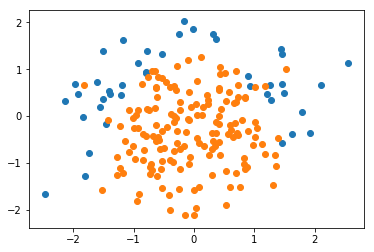

In [5]:
# 绘样本数据
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
log_reg.score(X_test, y_test)

0.80000000000000004

In [10]:
def plot_decision_boundary(model, axis):
    # meshgrid函数用两个坐标轴上的点在平面上画格，返回坐标矩阵
    X0, X1 = np.meshgrid(
        # 随机两组数，起始值和密度由坐标轴的起始值决定
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    # ravel()方法将高维数组降为一维数组，c_[]将两个数组以列的形式拼接起来，形成矩阵
    X_grid_matrix = np.c_[X0.ravel(), X1.ravel()]
    
    # 通过训练好的逻辑回归模型，预测平面上这些点的分类
    y_predict = model.predict(X_grid_matrix)
    y_predict_matrix = y_predict.reshape(X0.shape)
    
    # 设置色彩表
    from matplotlib.colors import ListedColormap
    my_colormap = ListedColormap(['#0000CD', '#40E0D0', '#FFFF00'])
    
    # 绘制等高线，并且填充等高区域的颜色
    plt.contourf(X0, X1, y_predict_matrix, linewidth=5, cmap=my_colormap)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


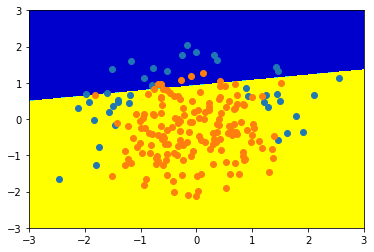

In [11]:
plot_decision_boundary(log_reg, axis=[-3, 3, -3, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [39]:
def PolynomialLogisiticRegression(degree, C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])

In [40]:
ploy_log_reg = PolynomialLogisiticRegression(degree=2, C=1)

In [41]:
ploy_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [42]:
ploy_log_reg.score(X_test, y_test)

0.93999999999999995

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


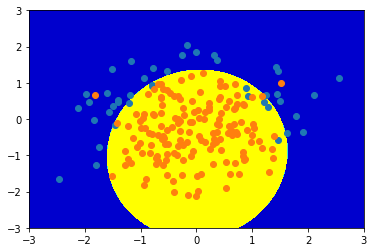

In [43]:
plot_decision_boundary(ploy_log_reg, axis=[-3, 3, -3, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [44]:
ploy_log_reg2 = PolynomialLogisiticRegression(degree=20, C=1)

In [45]:
ploy_log_reg2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [46]:
ploy_log_reg2.score(X_test, y_test)

0.90000000000000002

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


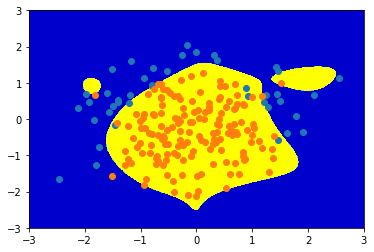

In [47]:
plot_decision_boundary(ploy_log_reg2, axis=[-3, 3, -3, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [57]:
ploy_log_reg3 = PolynomialLogisiticRegression(degree=20, C=0.1)

In [58]:
ploy_log_reg3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [59]:
ploy_log_reg3.score(X_test, y_test)

0.92000000000000004

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


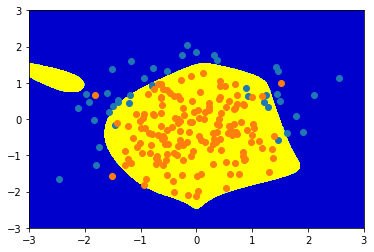

In [60]:
plot_decision_boundary(ploy_log_reg3, axis=[-3, 3, -3, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()